In [1]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from Analysis.lfp_analysis import opto_spectrum_analysis
from Analysis.utils import bootstrap
from Style.style_guide import animal_style
# from ms_opto_stim_protocol import OptoStimProtocol, OptoStimProtocolLaser, OptoStimProtocolClosedLoop
# from Analysis.lfp_analysis import get_control_test_power_spectrum, get_ref_electrode_index, entrainment_statistics, entrainment_statistics_distribution
# # from Analysis.utils import filter_animal, weighted_quantile, filter_task, convert_delta_marks_to_timestamp_values


[2025-04-09 07:52:12,384][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2025-04-09 07:52:12,418][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


### Power Spectrum and statistics for individual animals, open-loop

In [3]:
# from ms_opto_stim_protocol import OptoStimProtocol, OptoStimProtocolLaser, OptoStimProtocolClosedLoop
# from spyglass.lfp.v1 import LFPArtifactDetection
# from spyglass.position.v1 import TrodesPosV1
# from spyglass.position import PositionOutput
# from spyglass.linearization.v1 import LinearizedPositionV1
# key = {'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 0 valid times',
#        'trodes_pos_params_name': 'single_led_upsampled'}
# merge_id = (PositionOutput.TrodesPosV1() & key).fetch1('merge_id')
# LinearizedPositionV1() &{"pos_merge_id": merge_id} &  "track_graph_name LIKE '%ms_lineartrack%'"

# # LFPArtifactDetection().fetch('artifact_removed_valid_times')[0]
# # from spyglass.common import Session

# # (OptoStimProtocol() * Session)&{'subject_id': "Frodo"}
# # drive_freq
# # key = {'nwb_file_name': 'Bilbo20230724_.nwb', 'epoch': None, 'interval_list_name': 'pos 11 valid times'}
# # (OptoStimProtocol & key).validate_intervals(key)

In [2]:
from Analysis.utils import filter_opto_data

filter_opto_data({"animal": "Odins", "period_ms": 100})

datasets: 9


nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,dio_event_name the name assigned to this DIO event,opto_infer_params_name name for this set of parameters,optogenetic_protocol name of optogenetic protocol type (e.g. pulse train),pulse_length_ms length of individual pulse,inter_pulse_interval_ms time between pulses in a train (= np.nan if pulses_per_train=1 or phase-targeting feedback),inter_train_interval_ms time between end of train and start of new one (= np.nan if phase-targeting feedback),period_ms time between successive train starts (= np.nan if phase-targeting feedback),pulses_per_train number of pulses in a train,number_trains mean number of train events observed between behavior-off intervals,stim_on whether any optogenetic stimulus occured in this interval,test_intervals numpy array with start and end times for each interval optogenetics is running,control_intervals numpy array with start and end times for each interval optogenetics is off
Odins20220107_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,41.1,1,=BLOB=,=BLOB=
Odins20220110_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,6,95,100,1,32.4231,1,=BLOB=,=BLOB=
Odins20220111_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,24.9146,1,=BLOB=,=BLOB=
Odins20220113_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,16.775,1,=BLOB=,=BLOB=
Odins20220118_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,20.6875,1,=BLOB=,=BLOB=
Odins20220119_.nwb,pos 2 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,19.1183,1,=BLOB=,=BLOB=
Odins20220119_.nwb,pos 7 valid times,stim,default_pulse_train,pulse_train,5,-1,95,100,1,24.878,1,=BLOB=,=BLOB=
Odins20220123_.nwb,pos 0 valid times,stim,default_pulse_train,pulse_train,2,1,86,100,4,63.4732,1,=BLOB=,=BLOB=
Odins20220123_.nwb,pos 1 valid times,stim,default_pulse_train,pulse_train,40,-1,60,100,1,21.9655,1,=BLOB=,=BLOB=


In [3]:
from spyglass.common import PositionIntervalMap, TaskEpoch

from Metadata.ms_task_identification import TaskIdentification
from Metadata.ms_task_identification import TaskIdentification
from Time_and_trials.ms_interval import EpochIntervalListName

key = {
    "nwb_file_name": "Bilbo20230724_.nwb",
    # "epoch": None,
    "interval_list_name": "pos 9 valid times",
}
((TaskIdentification * EpochIntervalListName) & key)

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),interval_list_name descriptive name of this interval list,contingency,task_environment
Bilbo20230724_.nwb,10,pos 9 valid times,Lineartrack,Lineartrack


datasets: 3
datasets: 3


0it [00:00, ?it/s]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:04,  4.10s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:19, 10.99s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:40, 13.34s/it]


datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:37, 37.73s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [01:17, 38.87s/it]


datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:20, 20.17s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:39, 19.70s/it]


datasets: 1
datasets: 1


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:13, 13.18s/it]


datasets: 1
datasets: 1


0it [00:00, ?it/s]

{'nwb_file_name': 'Odins20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:13, 13.14s/it]


datasets: 1
datasets: 1


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:38, 38.50s/it]


datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:20, 20.66s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:43, 21.62s/it]


datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Olive20220627_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:20, 20.39s/it]

{'nwb_file_name': 'Olive20220628_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:40, 20.27s/it]


datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:22, 22.07s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:42, 21.15s/it]


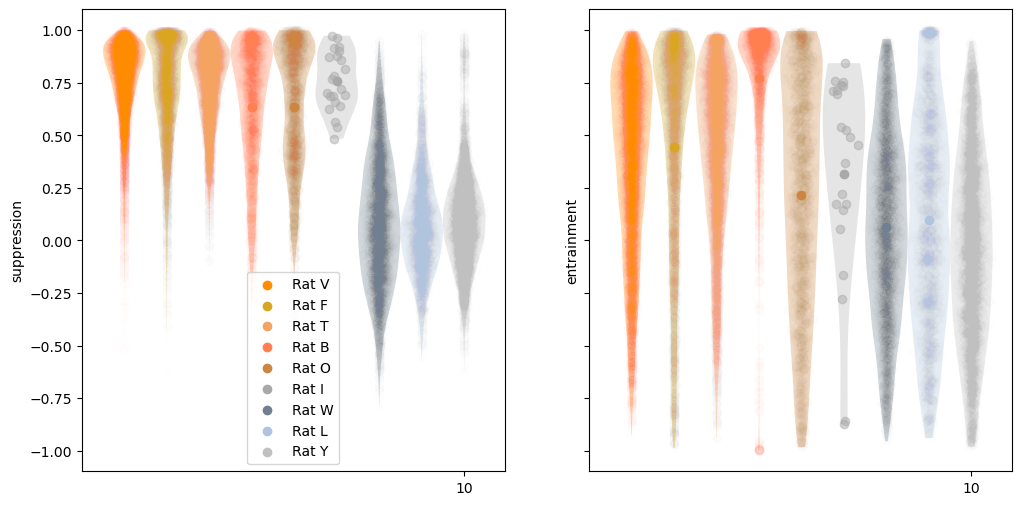

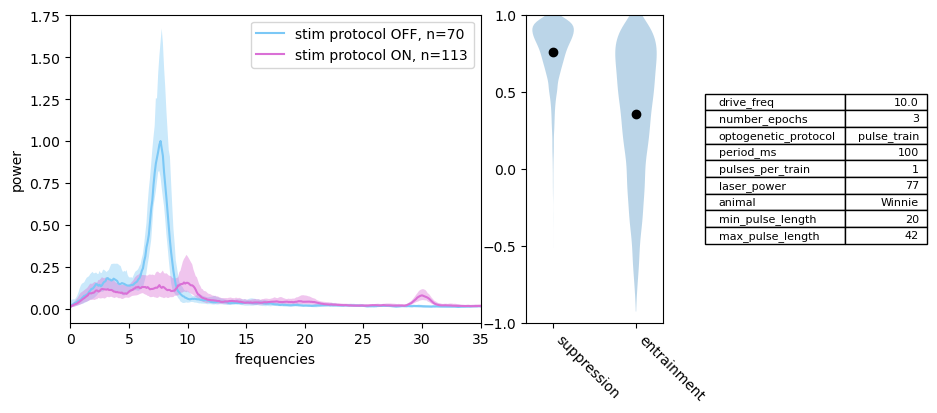

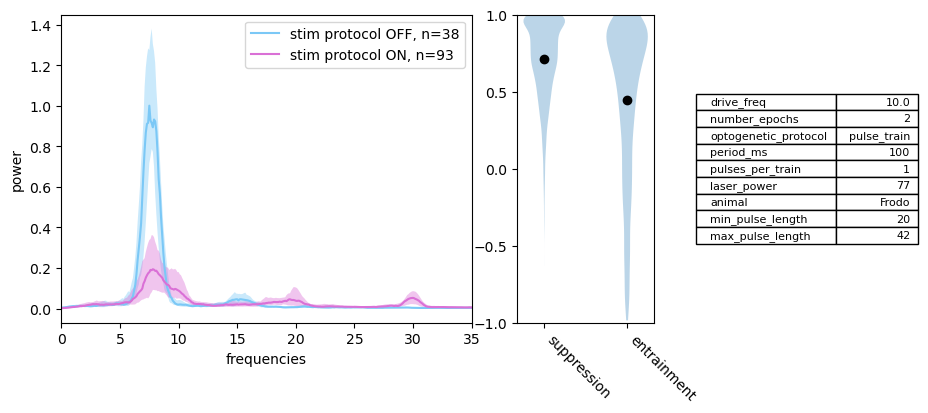

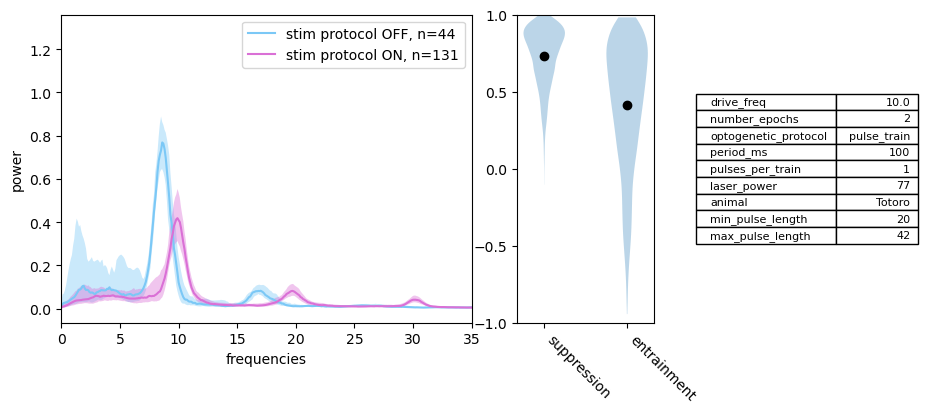

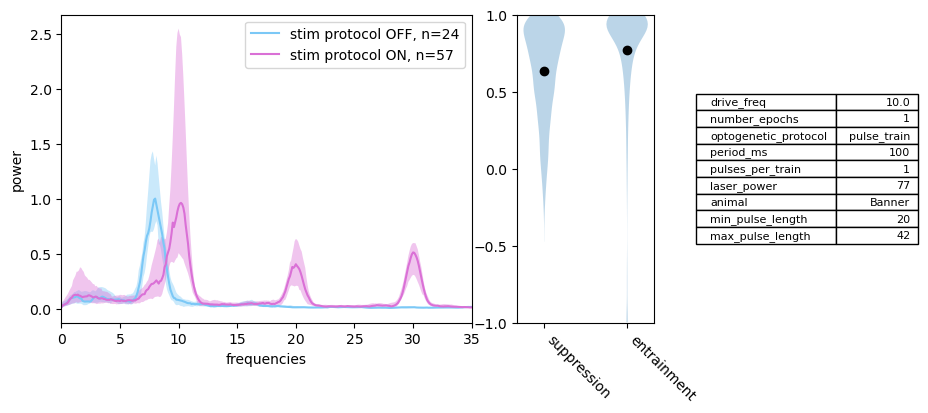

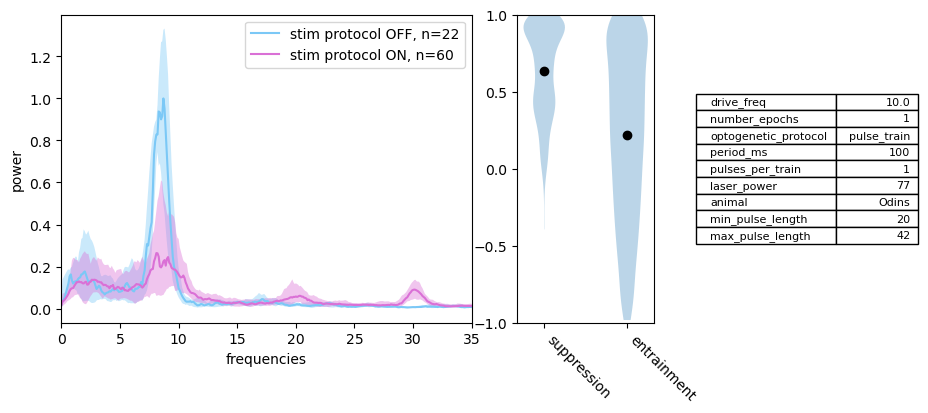

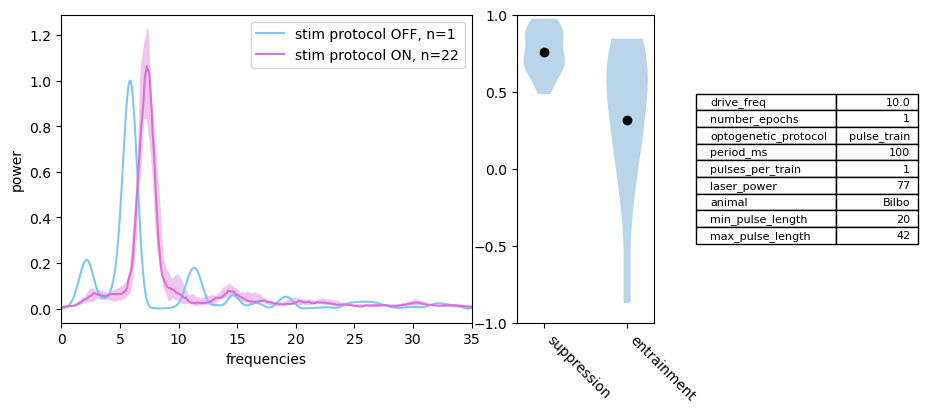

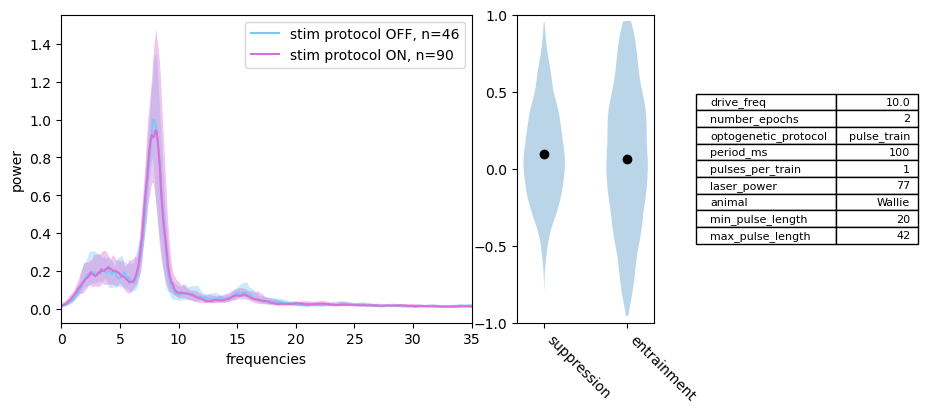

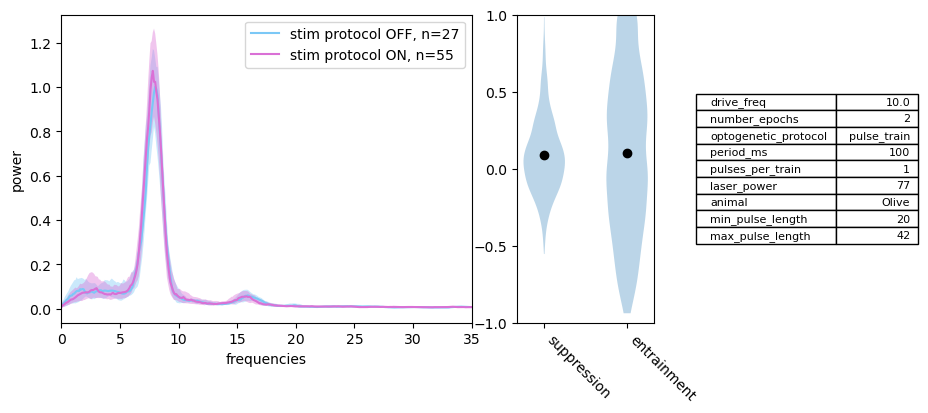

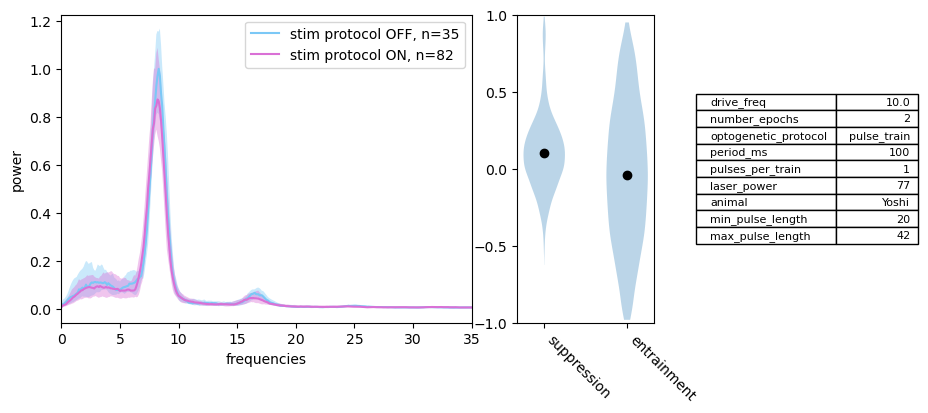

In [4]:
animal_list = [
    "Winnie",
    "Frodo",
    "Totoro",
    "Banner",
    "Odins",
    "Bilbo",
    "Wallie",
    "Olive",
    "Yoshi",
]

# animal_list = ["transfect"]
# animal_list = ["Yoshi"]
# animal_list = ["Bilbo"] # NOTE: BILBO has bad 10Hz position data
# animal_list = ["Banner"]
# animal_list = ["Frodo","Yoshi"]
# animal_list =["Odins"]
# ['Totoro','Banner','Winnie','Wallie','Yoshi', 'Olive',"Odins","Frodo","Bilbo"]
drive_freq_list = np.array([4, 6.06, 8, 10, 12.5, 20])  # np.array([12.5])#
drive_freq_list = np.array([10])
bootstrap_scores = False
compiled_scores = {}

if len(drive_freq_list) == 1:
    score_fig, score_ax = plt.subplots(
        ncols=2, sharex=True, sharey=True, figsize=(12, 6)
    )
else:
    score_fig, score_ax = plt.subplots(
        nrows=2, sharex=True, sharey=True, figsize=(12, 6)
    )
for n_animal, animal in enumerate(animal_list):
    score_list = []
    for drive_freq in drive_freq_list:
        dataset_key = {
            "optogenetic_protocol": "pulse_train",
            "period_ms": int(1 / drive_freq * 1000),
            "pulses_per_train": 1,
            "laser_power": 77,
            "animal": animal,
            "min_pulse_length": 20,
            "max_pulse_length": 42,
            # "nwb_file_name":"Frodo20230809_.nwb"
        }

        fig, scores = opto_spectrum_analysis(
            dataset_key, return_distributions=True, filter_speed=10.0
        )
        score_list.append(list(scores))
    if fig is None:
        continue
    plt.rcParams["svg.fonttype"] = "none"
    dir = f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/{drive_freq}Hz"
    os.makedirs(dir, exist_ok=True)
    fig.savefig(f"{dir}/{animal}_{drive_freq}hz_opto_spectrum.svg")
    #     break
    # break
    score_list = np.array(score_list)
    score_names = ["suppression", "entrainment"]
    width = 0.1
    color = animal_style.loc[animal].color  # plt.cm.jet(n_animal/8)
    x_loc = np.arange(len(score_list)) + n_animal * width / 5
    if len(drive_freq_list) == 1:
        x_loc = np.array([n_animal * width])

    compiled_scores[animal] = score_list
    for i in range(2):
        if bootstrap_scores:
            data = [bootstrap(dat, int(1e4)) for dat in score_list[:, i]]

            violin = score_ax[i].violinplot(
                data,
                showmeans=False,
                showextrema=False,
                showmedians=False,
                positions=x_loc,
                widths=width,
            )
            for pc in violin["bodies"]:
                pc.set_facecolor(color)
                # pc.set_edgecolor(color)
                pc.set_alpha(0.3)
        else:
            from Analysis.utils import violin_scatter

            data = [dat for dat in score_list[:, i]]
            for ii, dat in enumerate(data):
                violin_scatter(
                    dat,
                    x_loc[ii],
                    ax=score_ax[i],
                    color=color,
                    widths=width,
                    # alpha=0.3,
                )
        score_ax[i].scatter(
            x_loc,
            [np.mean(d) for d in data],
            label=animal_style.loc[animal]["alias"],
            color=color,
        )
        score_ax[i].set_ylabel(score_names[i])
        score_ax[i].set_xticks(x_loc, labels=drive_freq_list)

    score_ax[0].legend()
    # break

In [5]:
compiled_scores.pop("Bilbo")

array([[[ 0.7689488 ,  0.8596474 ,  0.8772184 ,  0.6865956 ,
          0.87483495,  0.4840136 ,  0.6858024 ,  0.9204874 ,
          0.6246857 ,  0.9164291 ,  0.5377265 ,  0.8167557 ,
          0.7224157 ,  0.56237274,  0.63925046,  0.96216464,
          0.90066296,  0.6914231 ,  0.97358066,  0.78240186,
          0.6601201 ,  0.7018282 ],
        [-0.85856235,  0.17251723,  0.1427598 ,  0.7387364 ,
         -0.1656168 , -0.2788742 ,  0.7168675 ,  0.53966117,
          0.7087018 ,  0.84312975,  0.52370006,  0.17206863,
          0.7525876 ,  0.22219224,  0.05415892, -0.8736089 ,
          0.69750303,  0.73317355,  0.75674057,  0.4531714 ,
          0.36935273,  0.49173847]]], dtype=float32)

In [ ]:
# get counts of values
n_transfected = 0
n_control = 0
for animal in compiled_scores:
    n_animal = compiled_scores[animal].shape[-1]
    if animal_style.loc[animal].background == "grey":
        n_control += n_animal
    else:
        n_transfected += n_animal


print(dataset_key)
print(f"Number of transfected animal pairs: {n_transfected}")
print(f"Number of control animal pairs: {n_control}")

{'optogenetic_protocol': 'pulse_train', 'period_ms': 100, 'pulses_per_train': 1, 'laser_power': 77, 'animal': 'Yoshi', 'min_pulse_length': 20, 'max_pulse_length': 42}
Number of transfected animal pairs: 19896
Number of control animal pairs: 8495


NameError: name 'transfection_pval' is not defined

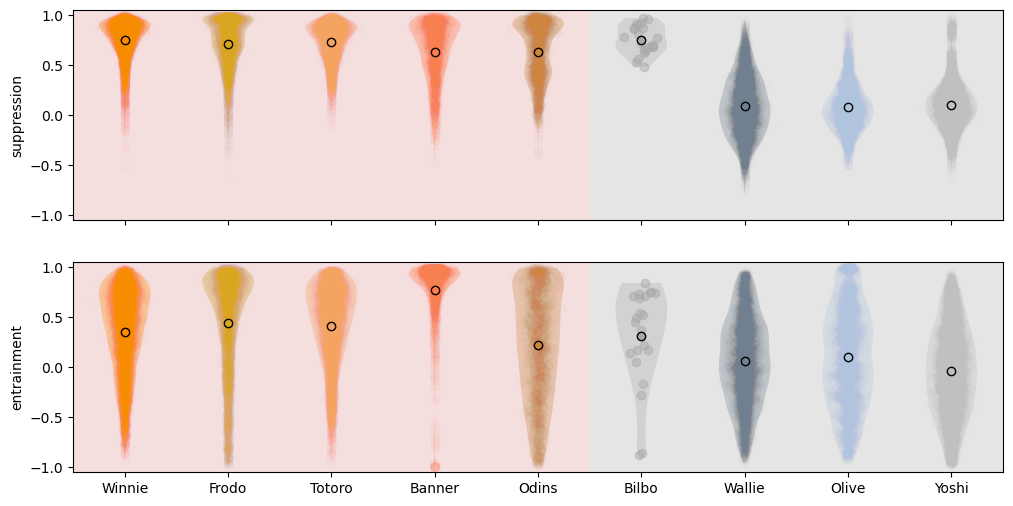

In [3]:
from Analysis.utils import violin_scatter

boxplot = False
fig, ax_list = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, sharey=True)
# ax_list = fig.gca()
for j, score_name in enumerate(score_names):
    ax = ax_list[j]
    for i, animal in enumerate(compiled_scores.keys()):
        data = compiled_scores[animal][:, j]
        if not boxplot:
            # print(animal,np.mean(compiled_scores[animal]),np.std(compiled_scores[animal]))
            violin_scatter(
                np.squeeze(data),
                pos=i,
                color=animal_style.loc[animal, "color"],
                mark_mean=True,
                alpha=0.1,
                ax=ax,
            )
            ax.scatter(
                [i],
                np.mean(data),
                facecolor=animal_style.loc[animal, "color"],
                edgecolor="k",
                zorder=10,
            )
        else:
            c = animal_style.loc[animal, "color"]
            ax.boxplot(
                np.squeeze(data),
                positions=[i],
                widths=0.4,
                patch_artist=True,
                showmeans=False,
                # showmedians=False,
                boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
                capprops=dict(color=c),
                whiskerprops=dict(color=c, lw=2),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                notch=True,
                showfliers=False,
            )

        ax.fill_between(
            [i - 0.5, i + 0.5],
            -2,
            2,
            facecolor=animal_style.loc[animal, "background"],
            alpha=0.2,
            zorder=-1,
        )
        ax.set_ylabel(score_name)
ax.set_xticks(range(len(compiled_scores.keys())), labels=compiled_scores.keys())
ax.set_ylim(-1.05, 1.05)
ax.set_xlim(-0.5, len(compiled_scores.keys()) - 0.5)
plt.rcParams["svg.fonttype"] = "none"
plt.suptitle(
    f"Lineartrack {drive_freq}Hz\n"
    + f"Entrainment transfection pval: {transfection_pval(compiled_scores,0):.03e}\n"
    + f"Suppression transfection pval: {transfection_pval(compiled_scores,1):.03e}"
)


boxplot_tag = "boxplot" if boxplot else "violin"
# fig.savefig(f'/home/sambray/Documents/MS_analysis_samsplaying/Plots/fens_2024/lineartrack_10Hz_{boxplot_tag}.svg')
dir = f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/{drive_freq}Hz"
# fig.savefig(
#     f"{dir}/lineartrack_{drive_freq}Hz_{boxplot_tag}{'_noBilbo' * ('Bilbo' not in compiled_scores)}.svg"
# )

In [4]:
import statsmodels.api as sms
import pandas as pd


def transfection_pval(compiled_scores, score_index=1):
    model_df = []
    for i, animal in enumerate(compiled_scores.keys()):
        data = compiled_scores[animal][:, score_index][0]
        for d in data:
            model_df.append(
                {
                    "Animal": animal,
                    "Treatment": (
                        "transfected"
                        if animal_style.loc[animal, "background"] == "indianred"
                        else "control"
                    ),
                    "Score": d,
                }
            )

    model_df = pd.DataFrame(model_df)

    from statsmodels.formula.api import mixedlm

    # Convert the 'Treatment' column to a categorical variable
    model_df["Treatment"] = model_df["Treatment"].astype("category")

    # Fit the mixed-effects model
    model = mixedlm("Score ~ Treatment", model_df, groups=model_df["Animal"])
    result = model.fit()

    # Print the summary of the model
    print(result.summary())
    return result.pvalues["Treatment[T.transfected]"]


f"{transfection_pval(compiled_scores,0):.03e}"

              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Score  
No. Observations:     28413       Method:                 REML   
No. Groups:           9           Scale:                  0.0584 
Min. group size:      22          Log-Likelihood:         -7.7631
Max. group size:      7910        Converged:              Yes    
Mean group size:      3157.0                                     
-----------------------------------------------------------------
                         Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept                0.254    0.107 2.366 0.018  0.044  0.464
Treatment[T.transfected] 0.440    0.144 3.062 0.002  0.158  0.721
Group Var                0.045    0.106                          



'2.200e-03'

In [ ]:
model_df = []
score_index = 0
n_transfected = 0
n_control = 0
for i, animal in enumerate(compiled_scores.keys()):
    data = compiled_scores[animal][:, score_index][0]
    print(animal, data.shape)
    for d in data:
        model_df.append(
            {
                "Animal": animal,
                "Treatment": (
                    "transfected"
                    if animal_style.loc[animal, "background"] == "indianred"
                    else "control"
                ),
                "Score": d,
            }
        )
    if animal_style.loc[animal, "background"] == "indianred":
        n_transfected += len(data)
    else:
        n_control += len(data)
print(n_transfected, n_control)

Winnie (7910,)
Frodo (3534,)
Totoro (5764,)
Banner (1368,)
Odins (1320,)
Bilbo (22,)
Wallie (4140,)
Olive (1485,)
Yoshi (2870,)
19896 8517


In [ ]:
# plt.rcParams["svg.fonttype"] = "none"
# score_fig.savefig("/home/sambray/Pictures/Fig_1/10Hz_score_plot.svg")

### individual plot


datasets: 1
datasets: 1


0it [00:00, ?it/s]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]


1it [00:02,  2.35s/it]


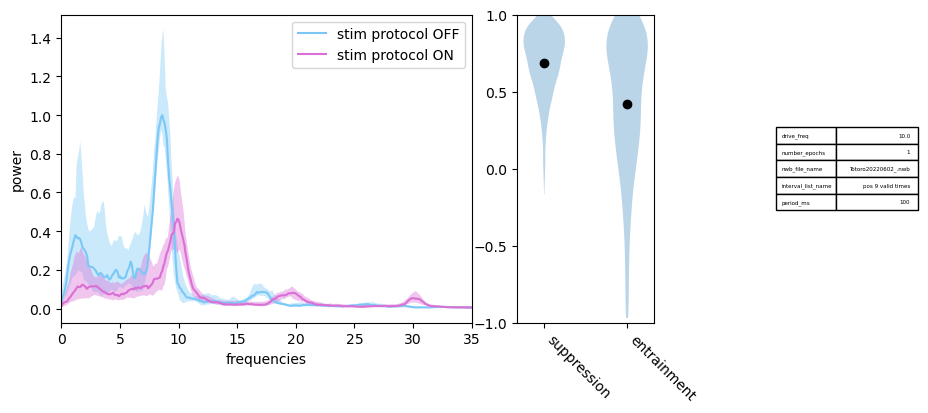

In [9]:
# specific epoch plots
animal = "Totoro"
period_ms = 100
dataset_key = {
    "optogenetic_protocol": "pulse_train",
    "period_ms": period_ms,
    "pulses_per_train": 1,
    "laser_power": 77,
    "animal": animal,
    "min_pulse_length": 25,
    "max_pulse_length": 42,
    # "nwb_file_name":"Frodo20230809_.nwb"
}
dataset_key = {
    "nwb_file_name": "Totoro20220602_.nwb",
    "interval_list_name": "pos 9 valid times",
    "period_ms": period_ms,
}  # 10hz
# dataset_key = {'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 9 valid times',"period_ms":period_ms} #10hz
fig, scores = opto_spectrum_analysis(
    dataset_key, return_distributions=True, filter_speed=10.0
)
plt.rcParams["svg.fonttype"] = "none"
fig.savefig(
    f"/home/sambray/Pictures/Fig_1/power_spectrum_single_epoch_{animal}_period_{period_ms}.svg"
)

In [4]:
score_fig.show
plt.rcParams["svg.fonttype"] = "none"
score_fig.savefig(
    "/home/sambray/Pictures/group_meet_112023/lfp_scores/score_summary.svg"
)

### Power Spectrum and statistics for pooled animals, open-loop

datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:36, 37.00s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [01:13, 36.75s/it]

{'nwb_file_name': 'Totoro20220530_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [01:32, 28.81s/it]

{'nwb_file_name': 'Totoro20220531_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:53, 25.36s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [02:12, 23.27s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [02:33, 22.59s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [02:56, 22.58s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [03:19, 22.69s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [03:39, 24.41s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:38, 38.64s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [01:14, 37.09s/it]

{'nwb_file_name': 'Totoro20220530_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [01:33, 28.61s/it]

{'nwb_file_name': 'Totoro20220531_.nwb', 'interval_list_name': 'pos 5 valid times'}


4it [01:44, 21.63s/it]

linear_limits [10, 126.8923664781934]
{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [02:30, 30.69s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [03:08, 33.16s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [03:30, 29.58s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [03:56, 28.39s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [04:16, 28.52s/it]


datasets: 12
datasets: 12


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 0 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:11, 11.49s/it]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 2 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:23, 11.58s/it]

{'nwb_file_name': 'Banner20220126_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:33, 11.18s/it]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


4it [01:11, 21.74s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


5it [01:49, 27.60s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 0 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [02:02, 22.60s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 2 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [02:14, 19.05s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:34, 19.30s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:54, 19.67s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


10it [03:16, 20.29s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


11it [03:37, 20.61s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


12it [04:00, 20.08s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:14, 14.29s/it]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:50, 27.34s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


3it [01:30, 33.21s/it]

{'nwb_file_name': 'Odins20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:44, 25.44s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [02:04, 23.36s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [02:24, 22.21s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [02:45, 21.93s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [03:07, 22.01s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [03:27, 23.06s/it]


datasets: 11
datasets: 11


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:37, 37.51s/it]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [01:14, 37.12s/it]

missing position: {'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 11 valid times'}
{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


4it [02:10, 31.49s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [02:24, 26.09s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [02:37, 22.14s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [02:57, 21.32s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [03:16, 20.72s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [03:36, 20.44s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


10it [03:56, 20.23s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


11it [04:15, 23.22s/it]


datasets: 5
datasets: 5


0it [00:00, ?it/s]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:19, 19.25s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:38, 19.12s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:56, 18.54s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:15, 19.02s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:36, 19.33s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (6, 2) + inhomogeneous part.

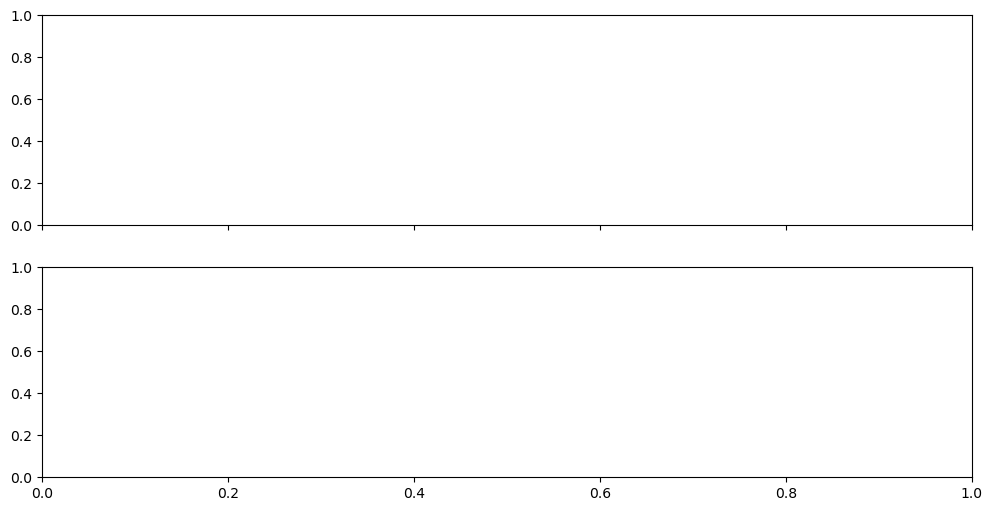

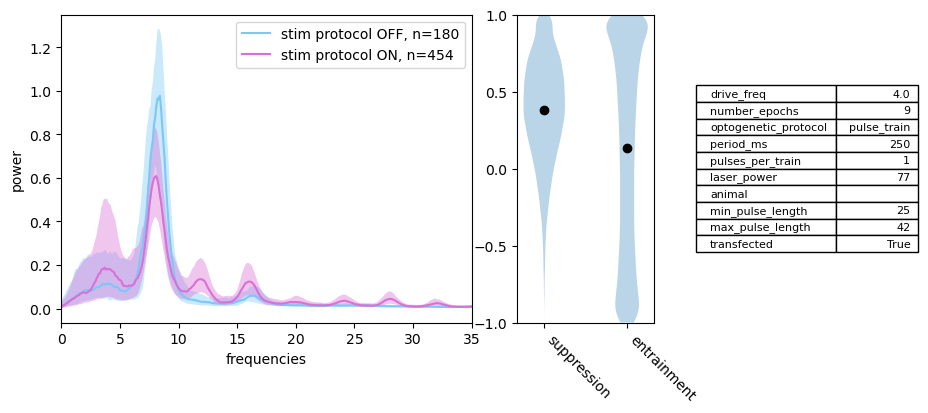

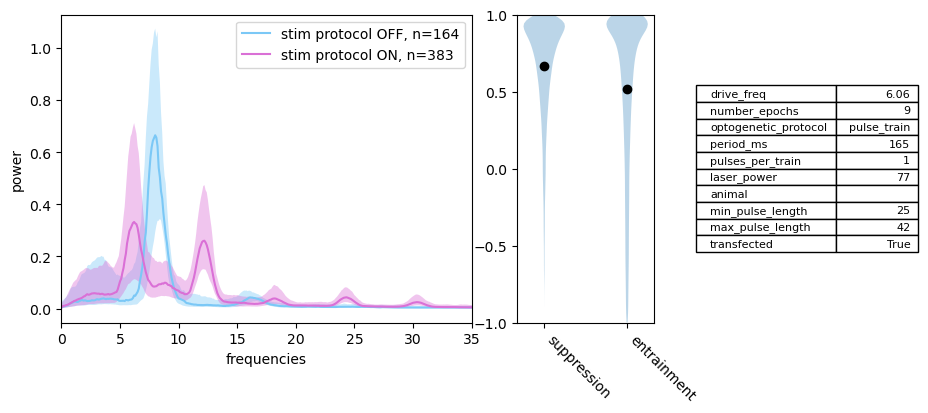

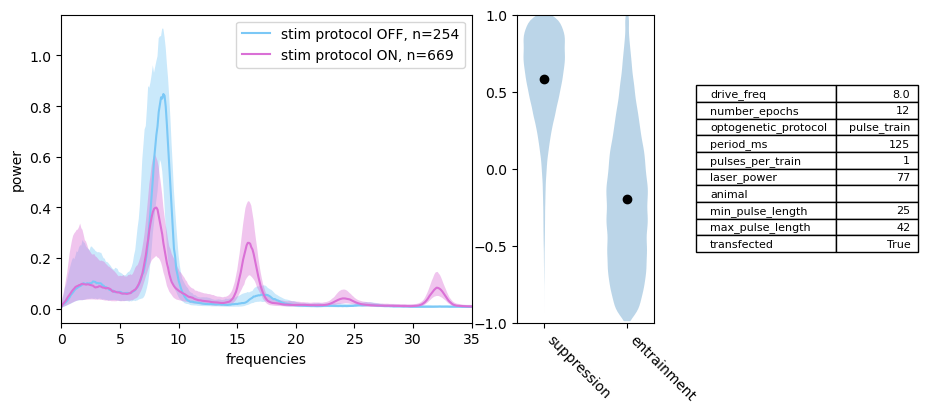

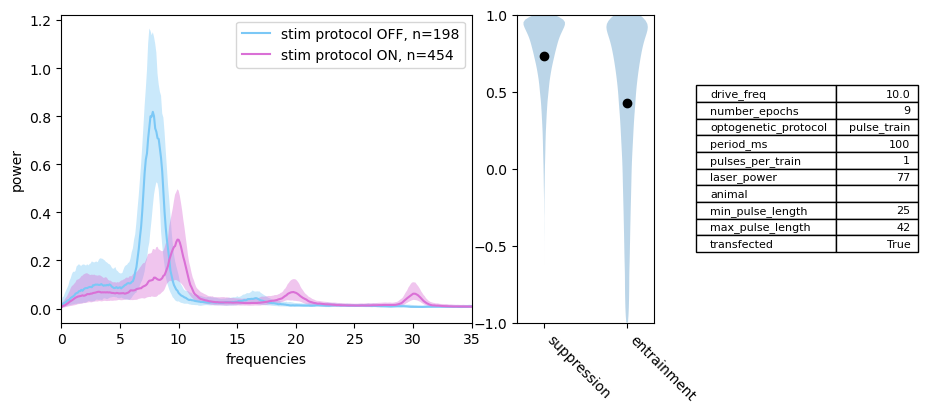

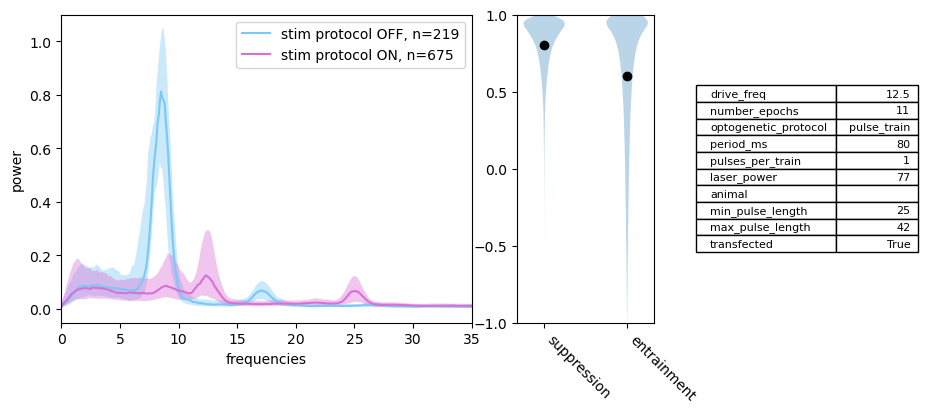

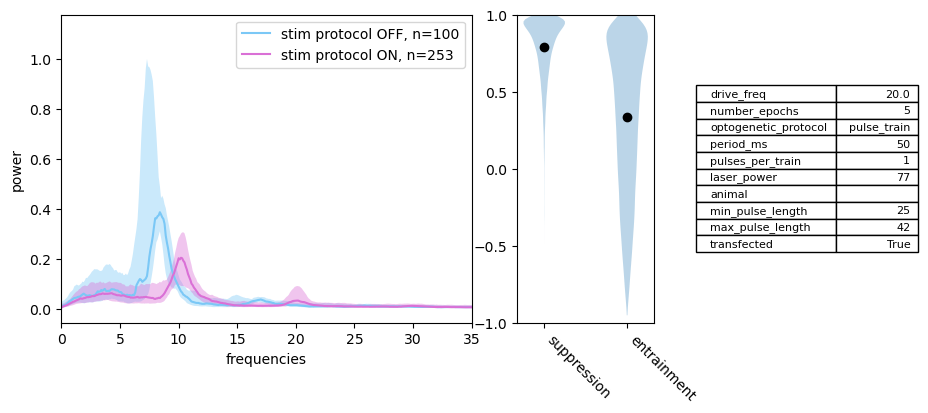

In [2]:
drive_freq_list = np.array([4, 6.06, 8, 10, 12.5, 20])
bootstrap_scores = True


score_fig, score_ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12, 6))
for n_genetic, transfected in enumerate([True, False]):
    score_list = []
    for drive_freq in drive_freq_list:
        dataset_key = {
            "optogenetic_protocol": "pulse_train",
            "period_ms": int(1 / drive_freq * 1000),
            "pulses_per_train": 1,
            "laser_power": 77,
            "animal": "",
            "min_pulse_length": 25,
            "max_pulse_length": 42,
            "transfected": transfected,
        }

        fig, scores = opto_spectrum_analysis(dataset_key, return_distributions=True)
        score_list.append(list(scores))

    score_list = np.array(score_list)
    score_names = ["suppression", "entrainment"]
    width = 0.5
    for i in range(2):
        if bootstrap_scores:
            data = [bootstrap(dat, int(1e4)) for dat in score_list[:, i]]
        else:
            data = score_list[:, i].copy()
        score_ax[i].violinplot(
            data,
            showmeans=False,
            showextrema=False,
            showmedians=False,
            positions=drive_freq_list + n_genetic * width / 2,
            widths=width,
        )
        score_ax[i].scatter(
            drive_freq_list + n_genetic * width / 2,
            [np.mean(d) for d in data],
            label=transfected,
        )
        score_ax[i].set_ylabel(score_names[i])
        score_ax[i].set_xticks(drive_freq_list)
    score_ax[0].legend()

datasets: 2
datasets: 2


0it [00:00, ?it/s]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [28.19000000000027, 65.6800000000004]


1it [00:01,  1.60s/it]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [32.15000000000083, 67.12000000000093]


2it [00:03,  1.52s/it]


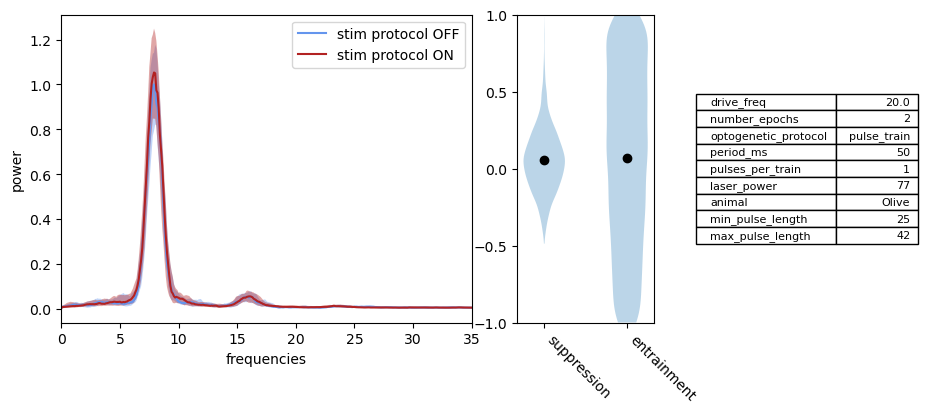

In [93]:
dataset_key = {
    "optogenetic_protocol": "pulse_train",
    "period_ms": int(1 / drive_freq * 1000),
    "pulses_per_train": 1,
    "laser_power": 77,
    "animal": animal,
    "min_pulse_length": 25,
    "max_pulse_length": 42,
}

fig, scores = opto_spectrum_analysis(dataset_key, return_distributions=True)

# Pooled transfection/control All frequencies

datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:22, 22.35s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:44, 22.12s/it]

{'nwb_file_name': 'Totoro20220530_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:56, 17.56s/it]

{'nwb_file_name': 'Totoro20220531_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:07, 15.16s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:19, 14.04s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:33, 13.79s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:49, 14.47s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:04, 14.78s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:16, 15.21s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:23, 23.07s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:44, 21.98s/it]

{'nwb_file_name': 'Totoro20220530_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:56, 17.42s/it]

{'nwb_file_name': 'Totoro20220531_.nwb', 'interval_list_name': 'pos 5 valid times'}


4it [01:02, 13.12s/it]

linear_limits [10, 126.8923664781934]
{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:15, 12.92s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:28, 12.94s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:43, 13.63s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [01:59, 14.31s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:11, 14.62s/it]


datasets: 12
datasets: 12


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 0 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:08,  8.04s/it]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 2 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:15,  7.81s/it]

{'nwb_file_name': 'Banner20220126_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:22,  7.24s/it]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


4it [00:45, 13.47s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


5it [01:07, 16.76s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 0 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:15, 13.73s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 2 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:23, 11.64s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [01:35, 11.93s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [01:47, 11.94s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


10it [02:02, 12.72s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


11it [02:17, 13.49s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


12it [02:33, 12.79s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:09,  9.62s/it]

{'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:32, 17.23s/it]

{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


3it [00:57, 20.79s/it]

{'nwb_file_name': 'Odins20220123_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:06, 16.41s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:20, 15.55s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:34, 14.99s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:48, 14.65s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:03, 14.76s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:16, 15.20s/it]


datasets: 11
datasets: 11


0it [00:00, ?it/s]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:08,  8.48s/it]

{'nwb_file_name': 'Banner20220124_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:16,  8.23s/it]

missing position: {'nwb_file_name': 'Frodo20230808_.nwb', 'interval_list_name': 'pos 11 valid times'}
{'nwb_file_name': 'Frodo20230809_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


4it [00:39, 10.26s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [00:47,  9.46s/it]

{'nwb_file_name': 'Odins20220124_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [00:55,  9.18s/it]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:09, 10.47s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [01:22, 11.30s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [01:35, 12.00s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


10it [01:48, 12.25s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


11it [02:01, 11.09s/it]


datasets: 5
datasets: 5


0it [00:00, ?it/s]

{'nwb_file_name': 'Totoro20220602_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


1it [00:11, 12.00s/it]

{'nwb_file_name': 'Totoro20220603_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:24, 12.32s/it]

{'nwb_file_name': 'Winnie20220713_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:36, 11.96s/it]

{'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [00:48, 12.24s/it]

{'nwb_file_name': 'Winnie20220715_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:02, 12.59s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:29, 29.05s/it]

{'nwb_file_name': 'Olive20220627_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:41, 19.37s/it]

{'nwb_file_name': 'Olive20220628_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:53, 15.99s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:05, 14.40s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 17 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:19, 14.12s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:31, 13.66s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:44, 13.30s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [01:56, 12.90s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:09, 14.34s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:28, 28.95s/it]

{'nwb_file_name': 'Olive20220627_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:41, 19.40s/it]

{'nwb_file_name': 'Olive20220628_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:54, 16.26s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:08, 15.34s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 15 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:24, 15.72s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:38, 15.13s/it]

{'nwb_file_name': 'Wallie20220916_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:50, 14.26s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:04, 14.05s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:18, 15.35s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:22, 22.93s/it]

{'nwb_file_name': 'Bilbo20230725_.nwb', 'interval_list_name': 'pos 10 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:45, 22.48s/it]

{'nwb_file_name': 'Bilbo20230726_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


3it [01:05, 21.76s/it]

{'nwb_file_name': 'Olive20220627_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:18, 18.00s/it]

{'nwb_file_name': 'Olive20220628_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:30, 15.77s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:43, 14.89s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:56, 14.33s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:09, 13.97s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:21, 15.77s/it]


datasets: 7
datasets: 7


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:22, 22.50s/it]

{'nwb_file_name': 'Olive20220627_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:35, 16.96s/it]

{'nwb_file_name': 'Olive20220628_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:48, 15.16s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:02, 14.60s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:15, 14.11s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:28, 13.85s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:41, 14.56s/it]


datasets: 9
datasets: 9


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230724_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:20, 20.16s/it]

{'nwb_file_name': 'Bilbo20230725_.nwb', 'interval_list_name': 'pos 1 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


2it [00:43, 21.78s/it]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:54, 17.22s/it]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 7 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:07, 15.47s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 15 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:21, 14.81s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:34, 14.34s/it]

{'nwb_file_name': 'Wallie20220916_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:47, 13.77s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


8it [02:01, 13.94s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 11 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


9it [02:14, 14.96s/it]


datasets: 7
datasets: 7


0it [00:00, ?it/s]

{'nwb_file_name': 'Bilbo20230725_.nwb', 'interval_list_name': 'pos 3 valid times'}
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]


1it [00:23, 23.05s/it]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 5 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


2it [00:35, 16.97s/it]

{'nwb_file_name': 'Olive20220629_.nwb', 'interval_list_name': 'pos 9 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


3it [00:48, 14.85s/it]

{'nwb_file_name': 'Wallie20220911_.nwb', 'interval_list_name': 'pos 17 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


4it [01:02, 14.59s/it]

{'nwb_file_name': 'Wallie20220912_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


5it [01:18, 15.18s/it]

{'nwb_file_name': 'Yoshi20220509_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


6it [01:31, 14.53s/it]

{'nwb_file_name': 'Yoshi20220510_.nwb', 'interval_list_name': 'pos 13 valid times'}
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]


7it [01:45, 15.09s/it]


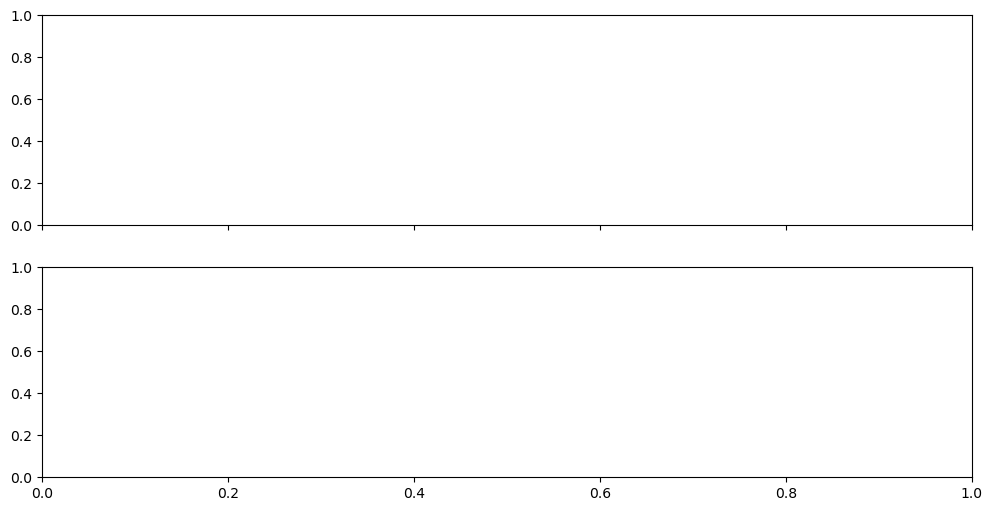

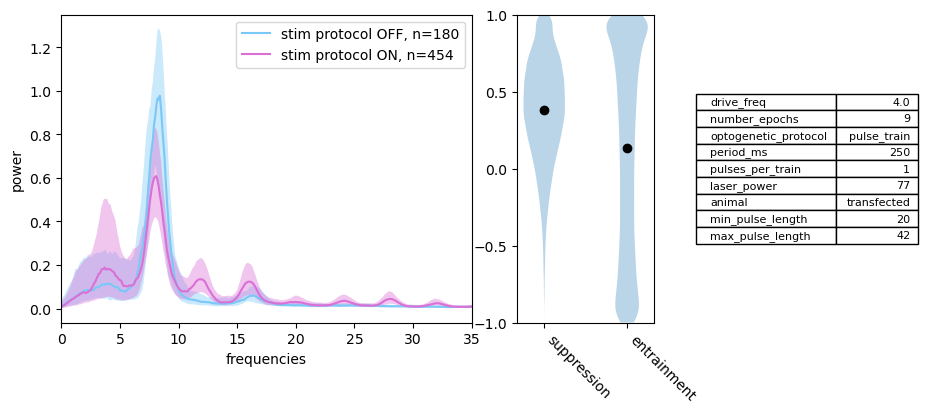

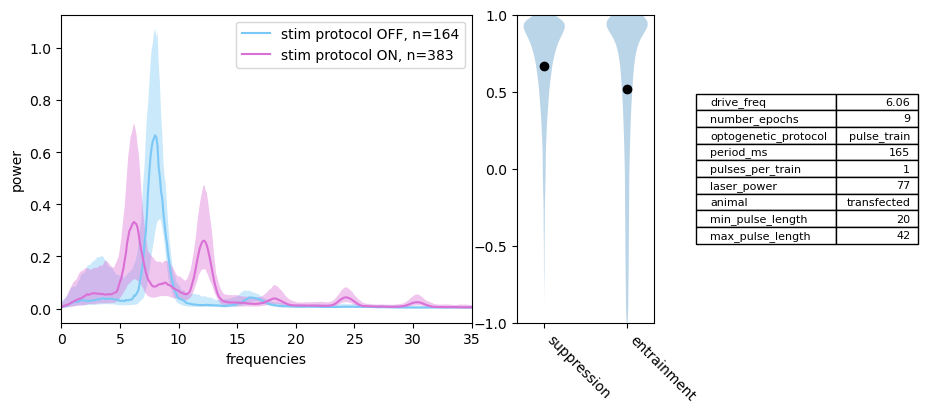

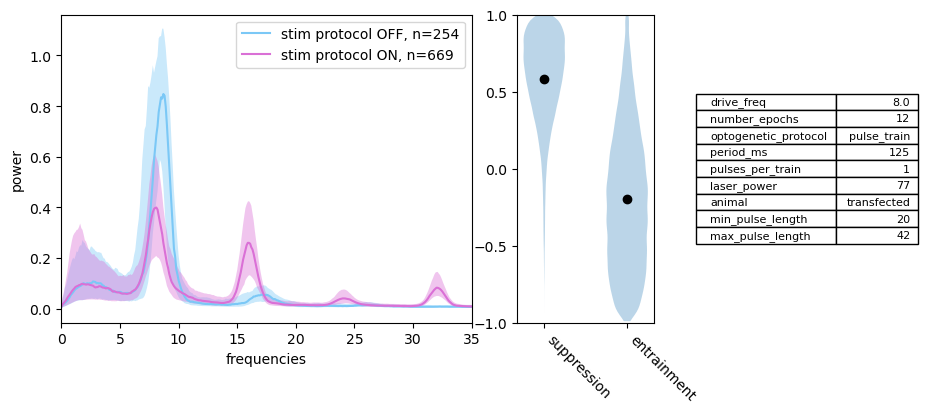

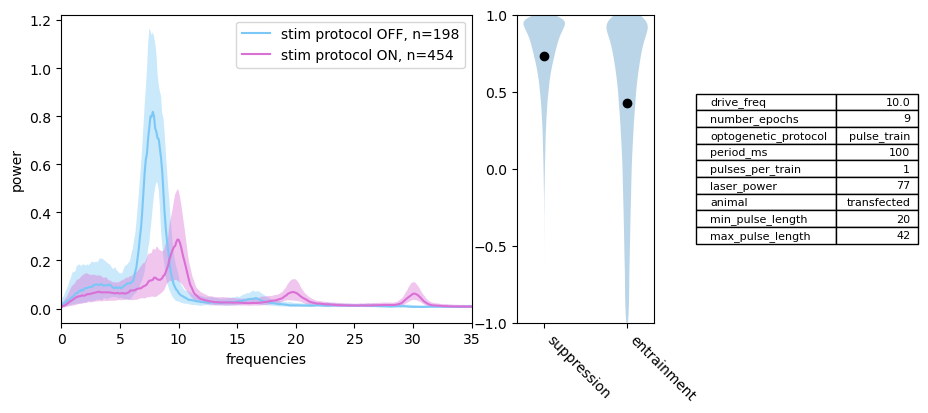

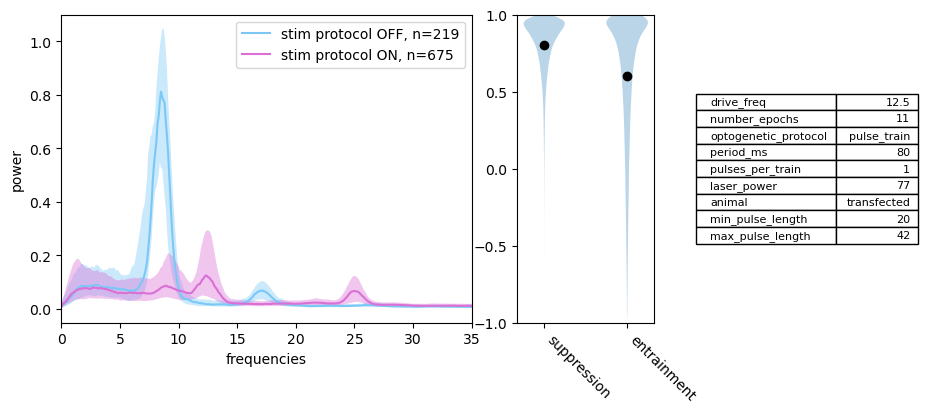

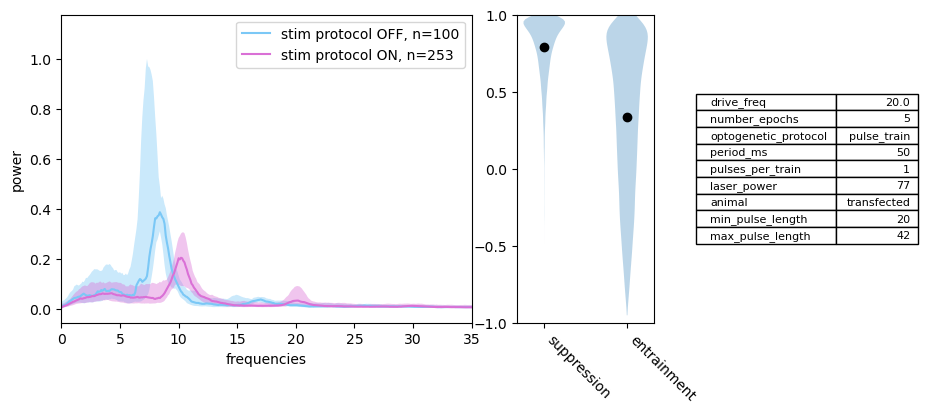

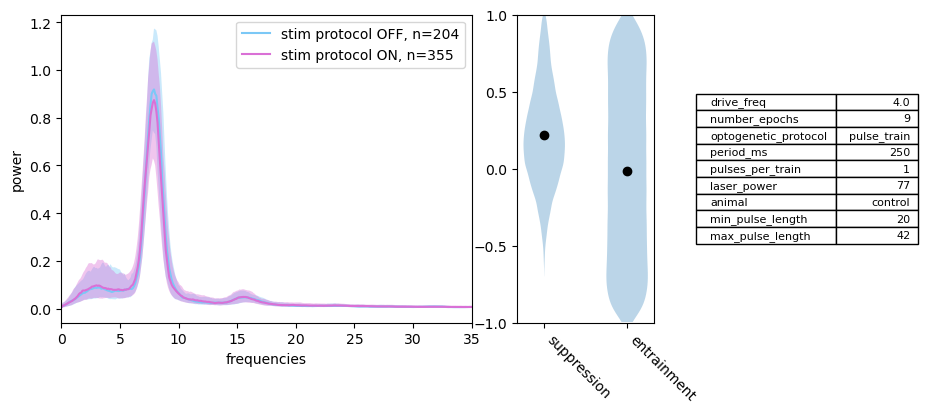

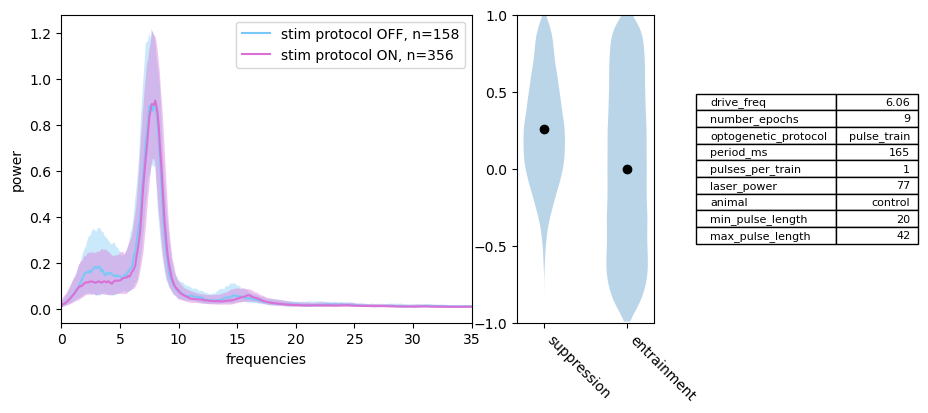

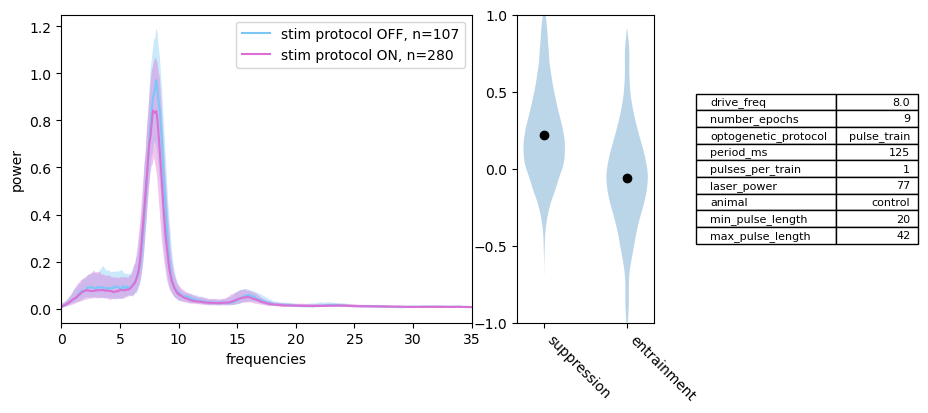

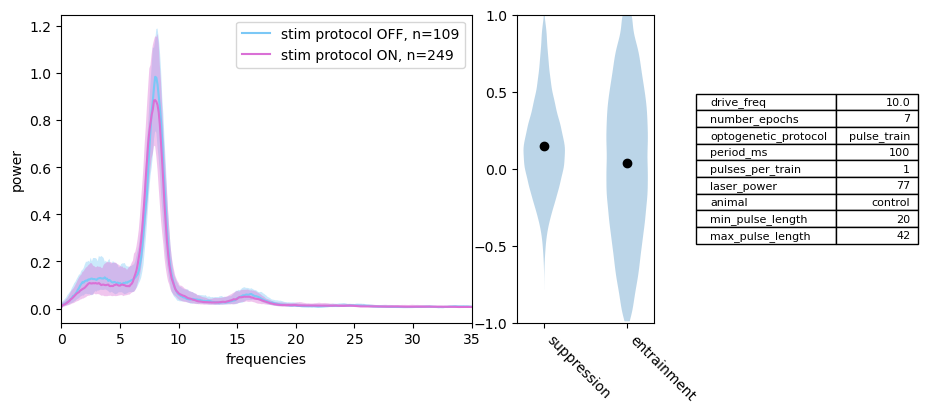

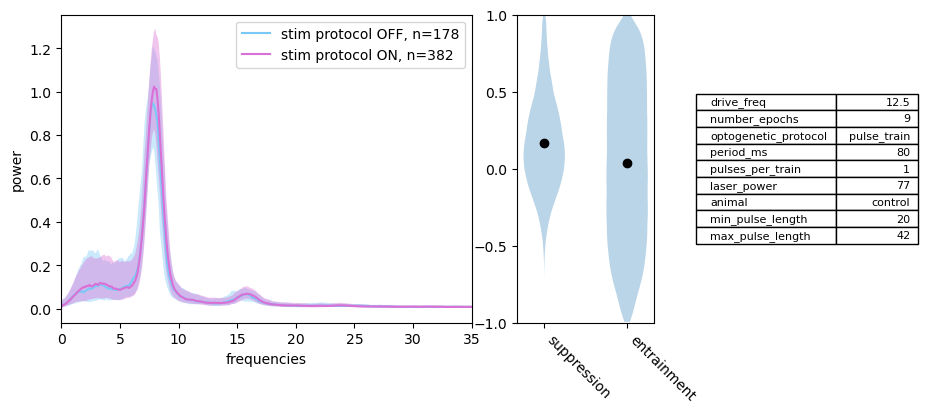

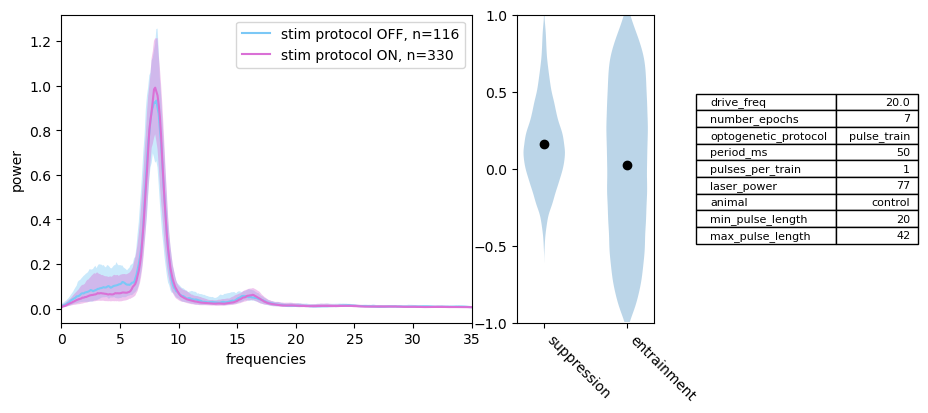

In [2]:
animal_list = ["transfected", "control"]

drive_freq_list = np.array([4, 6.06, 8, 10, 12.5, 20])  # np.array([12.5])#

bootstrap_scores = False
frequency_scores = {freq: {} for freq in drive_freq_list}

if len(drive_freq_list) == 1:
    score_fig, score_ax = plt.subplots(
        ncols=2, sharex=True, sharey=True, figsize=(12, 6)
    )
else:
    score_fig, score_ax = plt.subplots(
        nrows=2, sharex=True, sharey=True, figsize=(12, 6)
    )
for n_animal, animal in enumerate(animal_list):
    score_list = []
    for drive_freq in drive_freq_list:
        dataset_key = {
            "optogenetic_protocol": "pulse_train",
            "period_ms": int(1 / drive_freq * 1000),
            "pulses_per_train": 1,
            "laser_power": 77,
            "animal": animal,
            "min_pulse_length": 20,
            "max_pulse_length": 42,
            # "nwb_file_name":"Frodo20230809_.nwb"
        }

        fig, scores = opto_spectrum_analysis(
            dataset_key, return_distributions=True, filter_speed=10.0
        )
        frequency_scores[drive_freq][animal] = scores

[autoreload of spyglass.position.v1.imported_pose failed: Traceback (most recent call last):
  File "/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/sambray/mambaforge-pypy3/envs/spyglass2025/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/sambr

NameError: name 'frequency_scores' is not defined

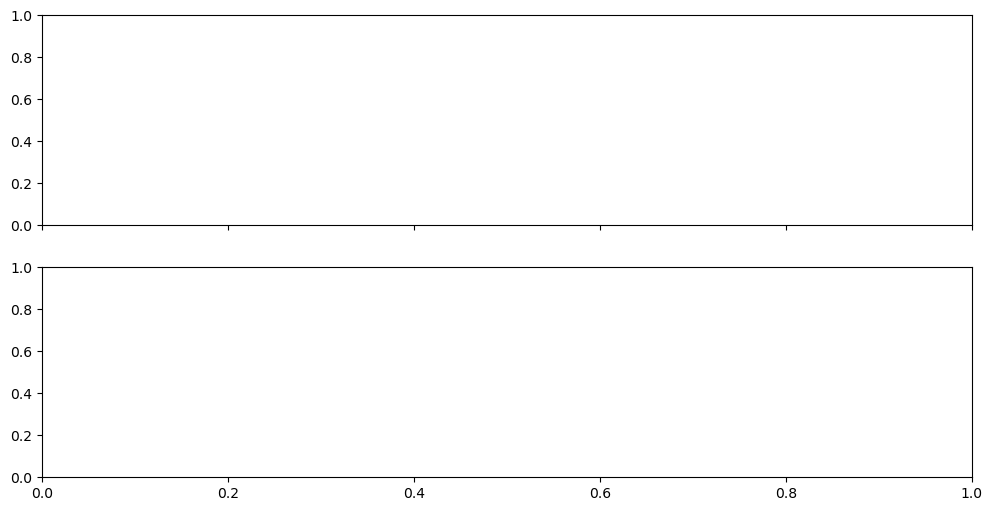

In [5]:
from Analysis.utils import violin_scatter

boxplot = False
fig, ax_list = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, sharey=True)
# ax_list = fig.gca()

score_names = ["suppression", "entrainment"]
for i_freq, (freq, compiled_scores) in enumerate(frequency_scores.items()):
    for j, score_name in enumerate(score_names):
        ax = ax_list[j]
        for i, animal in enumerate(compiled_scores.keys()):
            data = compiled_scores[animal][j][:100]
            pos_x = i_freq + 0.3 * (i - 1)
            if not boxplot:
                # print(animal,np.mean(compiled_scores[animal]),np.std(compiled_scores[animal]))
                violin_scatter(
                    np.squeeze(data),
                    pos=pos_x,
                    color=animal_style.loc[animal, "color"],
                    mark_mean=True,
                    alpha=0.1,
                    ax=ax,
                )
                ax.scatter(
                    [pos_x],
                    np.mean(data),
                    facecolor=animal_style.loc[animal, "color"],
                    edgecolor="k",
                    zorder=10,
                )
            else:
                c = animal_style.loc[animal, "color"]
                ax.boxplot(
                    np.squeeze(data),
                    positions=[pos_x],
                    widths=0.4,
                    patch_artist=True,
                    showmeans=False,
                    # showmedians=False,
                    boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
                    capprops=dict(color=c),
                    whiskerprops=dict(color=c, lw=2),
                    flierprops=dict(color=c, markeredgecolor=c),
                    medianprops=dict(color=c),
                    notch=True,
                    showfliers=False,
                )

            # ax.fill_between(
            #     [pos_x - 0.5, pos_x + 0.5],
            #     -2,
            #     2,
            #     facecolor=animal_style.loc[animal, "background"],
            #     alpha=0.2,
            #     zorder=-1,
            # )
            ax.set_ylabel(score_name)
ax.set_xticks(range(len(frequency_scores.keys())), labels=frequency_scores.keys())
# ax.set_ylim(-1.05, 1.05)
# ax.set_xlim(-0.5, len(compiled_scores.keys()) - 0.5)
# plt.rcParams["svg.fonttype"] = "none"
# plt.suptitle(
#     f"Lineartrack {drive_freq}Hz\n"
#     + f"Entrainment transfection pval: {transfection_pval(compiled_scores,0):.03e}\n"
#     + f"Suppression transfection pval: {transfection_pval(compiled_scores,1):.03e}"
# )


# boxplot_tag = "boxplot" if boxplot else "violin"


# fig.savefig(f'/home/sambray/Documents/MS_analysis_samsplaying/Plots/fens_2024/lineartrack_10Hz_{boxplot_tag}.svg')
# dir = f"/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/{drive_freq}Hz"
# fig.savefig(
#     f"{dir}/lineartrack_{drive_freq}Hz_{boxplot_tag}{'_noBilbo' * ('Bilbo' not in compiled_scores)}.svg"
# )